In [1]:
import pandas as pd
from pathlib import Path

In [2]:
fd = Path('data/raw')
fd

WindowsPath('data')

In [4]:
davis = pd.read_csv(fd / 'Davis_preprocessed_data.csv')
kiba = pd.read_csv(fd / 'Kiba_preprocessed_data.csv')

In [6]:
davis_ids = {'Drug': davis['Drug_ID'].unique(), 'Target': davis['Target_ID'].unique()}
kiba_ids = {'Drug': kiba['Drug_ID'].unique(), 'Target': kiba['Target_ID'].unique()}
davis_ids, kiba_ids

({'Drug': array([11314340, 24889392, 11409972, 11338033, 10184653,  5287969,
          6450551, 11364421,  9926054, 16007391,  5328940, 11234052,
         11656518,  6918454,   156414,  9933475, 11626560,  3062316,
           156422, 44150621,   176167,   176870, 42642645, 11717001,
         16725726, 11617559,   123631,     5291,  4908365, 11427553,
           208908,   126565, 11485656,  9929127, 11712649, 10074640,
         51004351, 11667893,  9915743,   644241,   447077, 10461815,
          9884685, 24180719, 25243800, 10113978, 17755052, 11984591,
           153999, 25127112,   176155, 24779724,  3025986, 10138260,
         10127622,   216239,    44259,  5329102, 16038120, 10427712,
         16722836,  3038522,  9926791,  5494449,  3038525,  3081361,
          9809715,   151194]),
  'Target': array(['AAK1', 'ABL1p', 'ABL2', 'ACVR1', 'ACVR2A', 'ADCK3', 'ADCK4',
         'AKT1', 'AKT2', 'AKT3', 'AMPK-alpha1', 'AMPK-alpha2', 'ANKK1',
         'ASK1', 'ASK2', 'AURKB', 'AURKC', 'BLK',

In [7]:
total_ids = {'DAVIS': davis_ids, 'KIBA': kiba_ids}

In [26]:
ofd = Path('data/preprocessed')
ofd.mkdir(exist_ok=True, parents=True)
for dt in ['DAVIS', 'KIBA']:
    ids = total_ids[dt]
    
    for mt in ['random', 'cold_split']:
        if mt == 'random':
            samples = 0
            for st in ['train', 'valid', 'test']:
                file = pd.read_csv(fd / dt / mt / f"{st}.csv")
                search = file[(file['Drug_ID'].isin(ids['Drug'])) & (file['Target_ID'].isin(ids['Target']))].reset_index(drop=True)
                o_path = ofd / dt / mt
                
                samples += len(search)
                
                # o_path.mkdir(exist_ok=True, parents=True)
                # search.to_csv(o_path / f"{st}.csv", index=False, header=True)
            print(f'{o_path}: {samples} samples')
            
        if mt == 'cold_split':
            for d in ['Drug', 'Drug_and_Target', 'Target']:
                samples = 0
                for st in ['train', 'valid', 'test']:
                    file = pd.read_csv(fd / dt / mt / d / f"{st}.csv")
                    search = file[(file['Drug_ID'].isin(ids['Drug'])) & (file['Target_ID'].isin(ids['Target']))].reset_index(drop=True)
                    o_path = ofd / dt / mt / d

                    samples += len(search)

                    # o_path.mkdir(exist_ok=True, parents=True)
                    # search.to_csv(o_path / f"{st}.csv", index=False, header=True)
                print(f'{o_path}: {samples} samples')
print('done')

data\preprocessed\DAVIS\random: 24208 samples
data\preprocessed\DAVIS\cold_split\Drug: 24208 samples
data\preprocessed\DAVIS\cold_split\Drug_and_Target: 12949 samples
data\preprocessed\DAVIS\cold_split\Target: 24208 samples
data\preprocessed\KIBA\random: 116784 samples
data\preprocessed\KIBA\cold_split\Drug: 116784 samples
data\preprocessed\KIBA\cold_split\Drug_and_Target: 63335 samples
data\preprocessed\KIBA\cold_split\Target: 116784 samples
done


<Axes: ylabel='Frequency'>

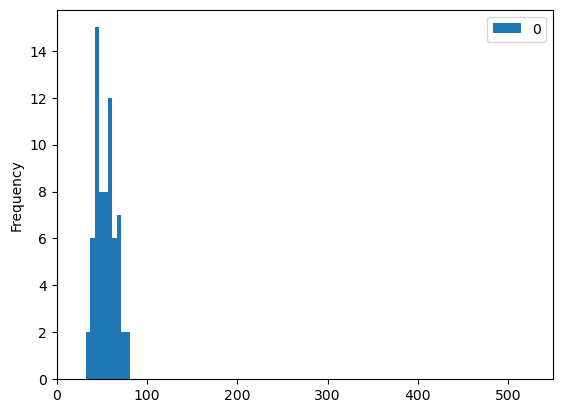

In [63]:
len_davis_d = pd.Series(davis['Drug'].unique()).apply(len)
min(len_davis_d), max(len_davis_d)
pd.DataFrame(len_davis_d).plot(kind='hist', xlim=(0, 550))

244 2549


<Axes: ylabel='Frequency'>

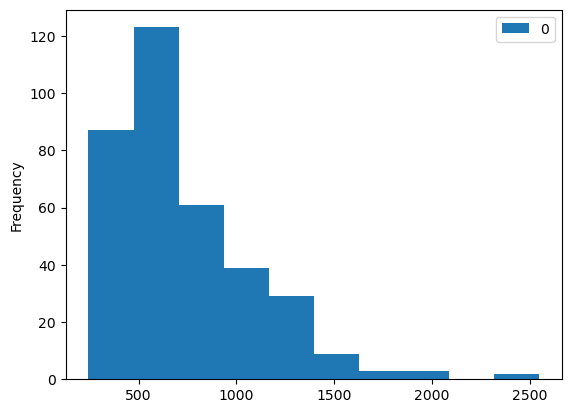

In [49]:
len_davis_p = pd.Series(davis['Target'].unique()).apply(len)
print(min(len_davis_p), max(len_davis_p))
pd.DataFrame(len_davis_p).plot(kind='hist')

14 532


<Axes: ylabel='Frequency'>

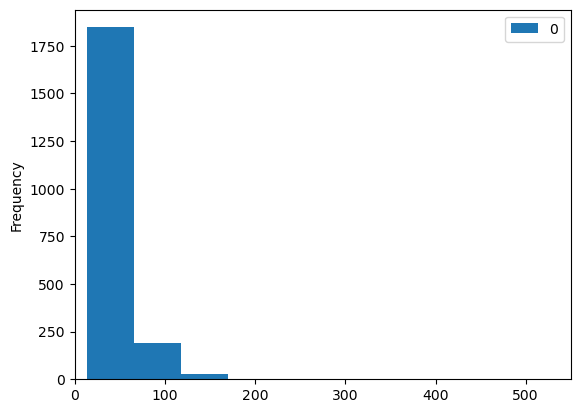

In [67]:
len_kiba_d = pd.Series(kiba['Drug'].unique()).apply(len)
print(min(len_kiba_d), max(len_kiba_d))
pd.DataFrame(len_kiba_d).plot(kind='hist', xlim=(0, 550))

In [62]:
(len_kiba_d > 150).sum()

np.int64(15)

215 2549


<Axes: ylabel='Frequency'>

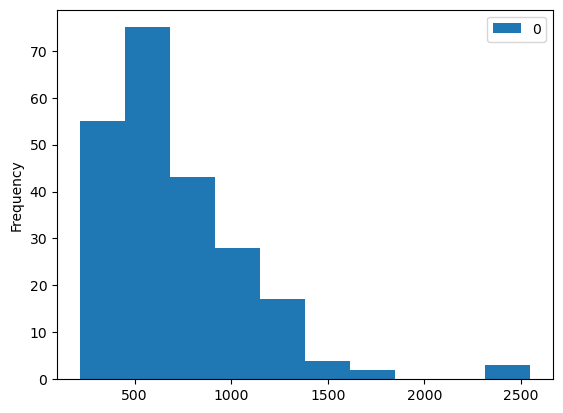

In [51]:
len_kiba_p = pd.Series(kiba['Target'].unique()).apply(len)
print(min(len_kiba_p), max(len_kiba_p))
pd.DataFrame(len_kiba_p).plot(kind='hist')

drug => max_length = 150

target => max_length = 1500

In [69]:
kiba['Drug']

0                   COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2
1                   COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2
2                   COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2
3                   COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2
4                   COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2
                                ...                        
116779    CNS(=O)(=O)c1ccccc1Nc1nc(Nc2cc(OC)c(OC)c(OC)c2...
116780           O=c1nc(-c2cc3c(Oc4ccc(I)cc4)cncc3s2)[nH]o1
116781      Nc1ncnc2c1c(-c1ccc(Oc3ccc(CO)cc3)cc1)cn2C1CCOC1
116782             CC1CCN(C(=O)CC#N)CC1N(C)c1ncnc2[nH]ccc12
116783                          Brc1ccc2cnc(Nc3ccncn3)cc2c1
Name: Drug, Length: 116784, dtype: object